In [1]:
import os
import numpy as np
import pandas as pd
import plotly as py
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import contextily as ctx
import matplotlib.image as mpimg
import matplotlib
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs 
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns
import geos
import mpl_toolkits
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from plotnine import *


In [2]:
movies_df=pd.read_csv('movie_metadata.csv')

In [3]:
movies_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
movies_df.isna().any()

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link              False
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [5]:
movies_df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [6]:
movies_df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [7]:
movies_df.drop('movie_imdb_link',axis=1,inplace=True)

In [8]:
movies_df.drop('color',axis=1,inplace=True)

In [9]:
movies_df.dropna(subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster','num_user_for_reviews','language','country','actor_2_facebook_likes','plot_keywords'],axis=0,inplace=True)

In [10]:
movies_df.shape

(4737, 26)

In [11]:
movies_df.content_rating.value_counts()

R            2082
PG-13        1436
PG            681
G             109
Not Rated     100
Unrated        58
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-G            3
TV-14           3
TV-PG           1
Name: content_rating, dtype: int64

In [12]:
movies_df.content_rating.fillna('R',inplace=True)

In [13]:
movies_df.isna().any()

director_name                False
num_critic_for_reviews       False
duration                     False
director_facebook_likes      False
actor_3_facebook_likes       False
actor_2_name                 False
actor_1_facebook_likes       False
gross                         True
genres                       False
actor_1_name                 False
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                 False
facenumber_in_poster         False
plot_keywords                False
num_user_for_reviews         False
language                     False
country                      False
content_rating               False
budget                        True
title_year                   False
actor_2_facebook_likes       False
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [14]:
movies_df.aspect_ratio.value_counts()

2.35     2311
1.85     1884
1.37       97
1.78       80
1.66       63
1.33       34
2.20       15
2.39       14
16.00       8
2.00        4
1.75        3
2.40        3
2.76        3
2.55        2
1.50        2
2.24        1
1.20        1
1.18        1
1.44        1
1.77        1
Name: aspect_ratio, dtype: int64

In [15]:
movies_df.aspect_ratio.mean()


2.1158259717316246

In [16]:
movies_df.aspect_ratio.median()

2.35

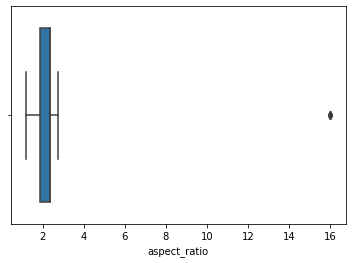

In [17]:
sns.boxplot('aspect_ratio',data=movies_df,orient='h')

As we see from the boxplot, median value is 2.35

In [18]:
movies_df.aspect_ratio.fillna(2.35,inplace=True)

In [19]:
movies_df.budget.median()

20000000.0

In [20]:
movies_df.budget.fillna(movies_df.budget.median(),inplace=True)


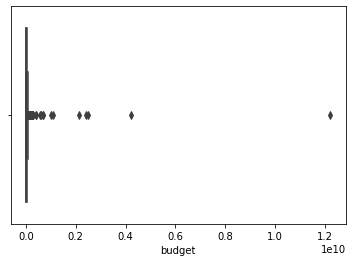

In [21]:
sns.boxplot('budget',data=movies_df)

The data is widely spread out in the budget section.

In [22]:
movies_df.gross.fillna(movies_df.gross.median(),inplace=True)

In [23]:
movies_df.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [24]:
movies_df.language.value_counts()

English       4444
French          69
Spanish         35
Mandarin        26
Hindi           25
German          18
Japanese        17
Russian         11
Cantonese       10
Italian         10
Portuguese       8
Korean           8
Danish           5
Norwegian        4
Dutch            4
Swedish          4
Persian          4
Hebrew           4
Arabic           3
Thai             3
Zulu             2
Dari             2
Indonesian       2
None             2
Aboriginal       2
Hungarian        1
Greek            1
Czech            1
Telugu           1
Romanian         1
Kazakh           1
Polish           1
Filipino         1
Aramaic          1
Mongolian        1
Vietnamese       1
Maya             1
Bosnian          1
Dzongkha         1
Icelandic        1
Name: language, dtype: int64

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



<Figure size 2160x720 with 0 Axes>

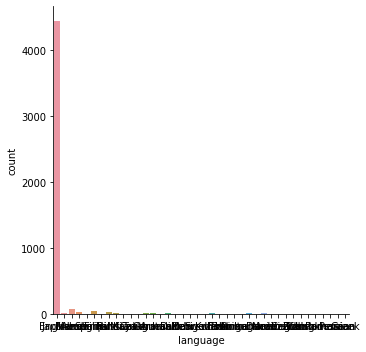

In [25]:
plt.figure(figsize=(30,10))
sns.factorplot('language',data=movies_df,kind='count')

In [26]:
movies_df['Net profit']=movies_df['budget']-movies_df['gross']

In [27]:
movies_df.sort_values(by='Net profit',ascending=False)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Net profit
2988,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,...,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000,1.221330e+10
3859,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,...,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000,4.199788e+09
3005,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,...,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607,2.499804e+09
2323,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,...,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000,2.397702e+09
2334,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,...,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973,2.127110e+09
3423,Katsuhiro Ôtomo,150.0,124.0,78.0,4.0,Takeshi Kusao,6.0,439162.0,Action|Animation|Sci-Fi,Mitsuo Iwata,...,Japanese,Japan,R,1.100000e+09,1988.0,5.0,8.1,1.85,0,1.099561e+09
4542,Takao Okawara,107.0,99.0,2.0,3.0,Naomi Nishida,43.0,10037390.0,Action|Adventure|Drama|Sci-Fi|Thriller,Hiroshi Abe,...,Japanese,Japan,PG,1.000000e+09,1999.0,3.0,6.0,2.35,339,9.899626e+08
3851,Carlos Saura,35.0,115.0,98.0,4.0,Juan Luis Galiardo,341.0,1687311.0,Drama|Musical,Mía Maestro,...,Spanish,Spain,PG-13,7.000000e+08,1998.0,26.0,7.2,2.00,539,6.983127e+08
3075,Karan Johar,20.0,193.0,160.0,860.0,John Abraham,8000.0,3275443.0,Drama,Shah Rukh Khan,...,Hindi,India,R,7.000000e+08,2006.0,1000.0,6.0,2.35,659,6.967246e+08
3273,Anurag Basu,41.0,90.0,116.0,303.0,Steven Michael Quezada,594.0,1602466.0,Action|Drama|Romance|Thriller,Bárbara Mori,...,English,India,R,6.000000e+08,2010.0,412.0,6.0,2.35,0,5.983975e+08


In [28]:
movies_df['Profit percentage']=(movies_df['budget']-movies_df['gross'])*100/movies_df['gross']

In [29]:
movies_df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Net profit,Profit percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0,-68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0,-3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0,22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0,-44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0,260.942743


In [30]:
movies_df.country.value_counts()

USA               3600
UK                 425
France             149
Canada             108
Germany             97
Australia           53
Spain               32
India               27
China               26
Japan               22
Italy               20
Hong Kong           16
New Zealand         14
South Korea         12
Ireland             11
Russia              11
Mexico              11
Denmark             11
South Africa         8
Brazil               8
Norway               7
Netherlands          5
Sweden               5
Thailand             4
Iran                 4
Argentina            4
Czech Republic       3
Belgium              3
West Germany         3
Switzerland          3
Israel               3
Iceland              2
Poland               2
Taiwan               2
Romania              2
Hungary              2
Greece               2
Kyrgyzstan           1
Georgia              1
New Line             1
Soviet Union         1
Colombia             1
Aruba                1
Indonesia  

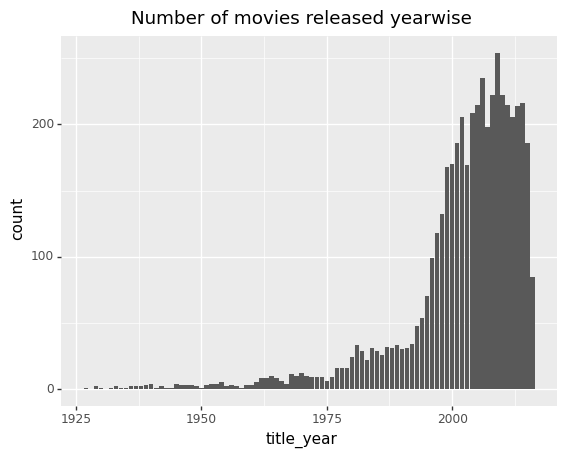

<ggplot: (7567912413)>

In [31]:
(ggplot(movies_df)+ aes(x='title_year')+ geom_bar(size=20)+labs(title='Number of movies released yearwise'))

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text major ticklabel objects>)

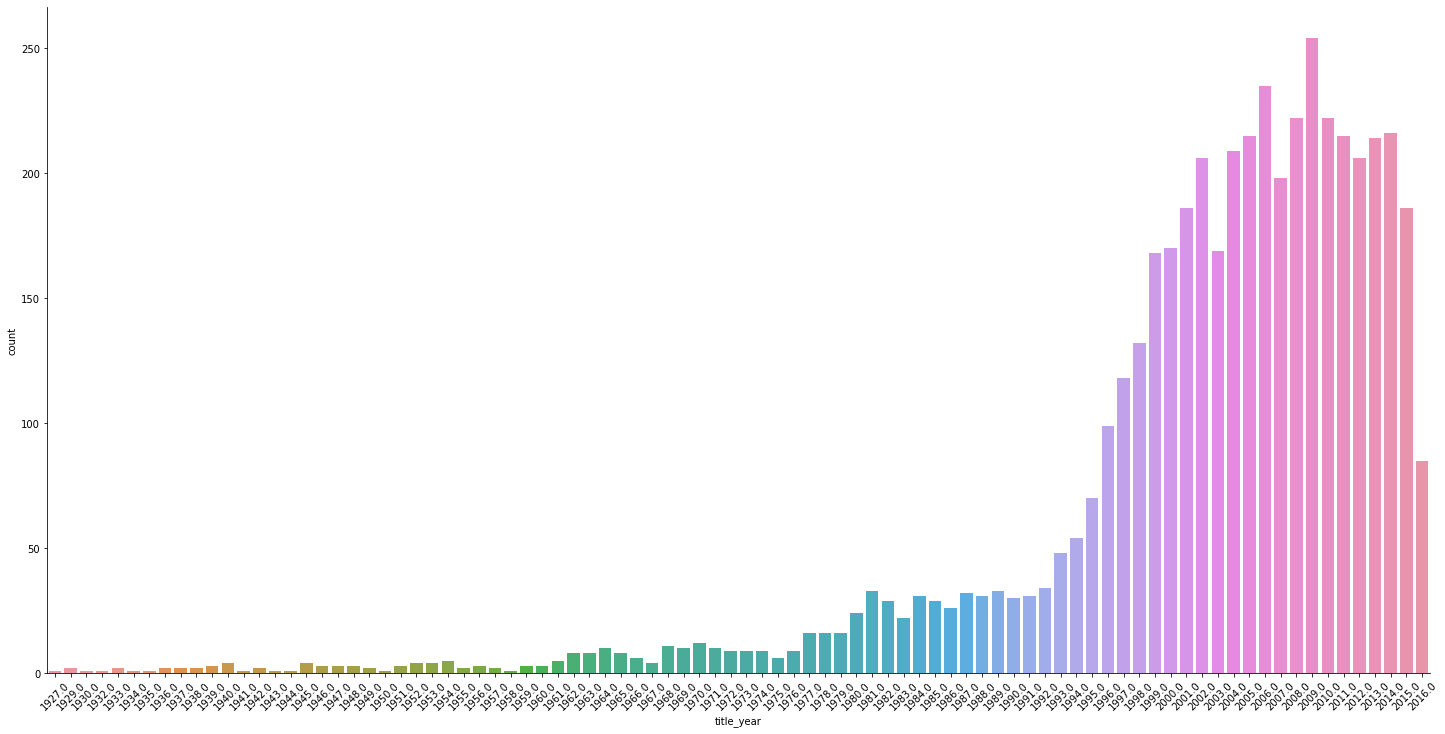

In [32]:

sns.factorplot('title_year',data=movies_df,kind='count',size=10,aspect=2)
plt.xticks(rotation=45,size=10)

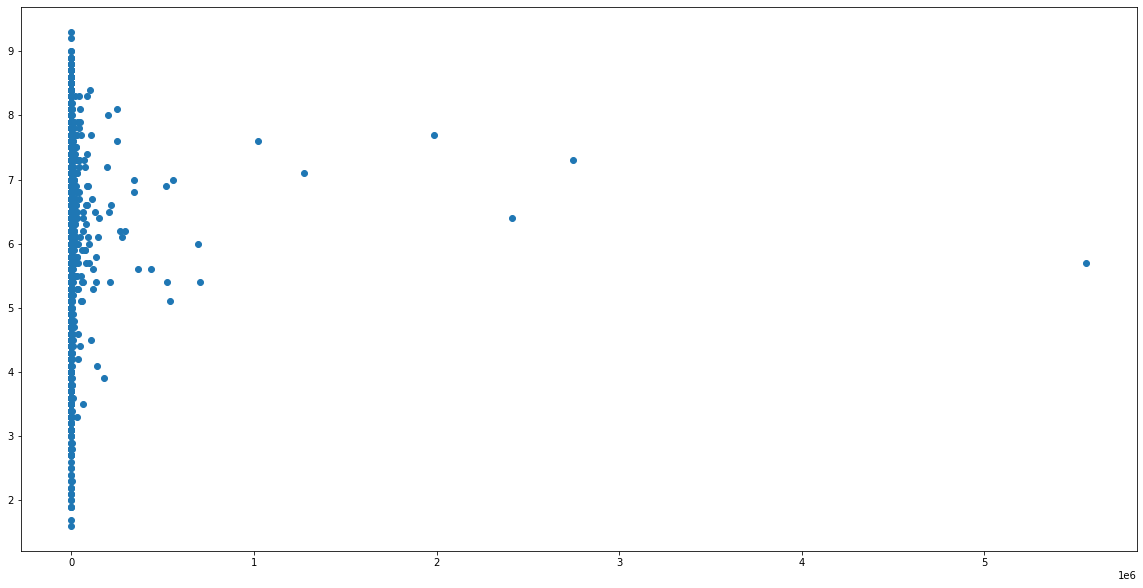

In [33]:
plt.figure(figsize=(20,10))
plt.scatter(movies_df['Profit percentage'],movies_df['imdb_score'])

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



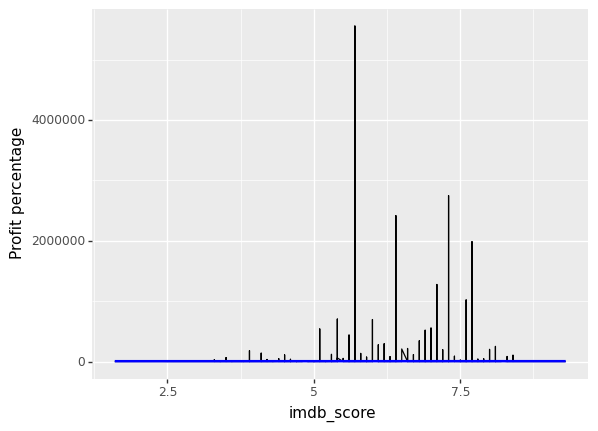

<ggplot: (7569334289)>

In [34]:
(ggplot(aes(x='imdb_score',y='Profit percentage'),data=movies_df)+ geom_line() +stat_smooth(colour='blue', span=1))

Text(0, 0.5, 'FB likes')

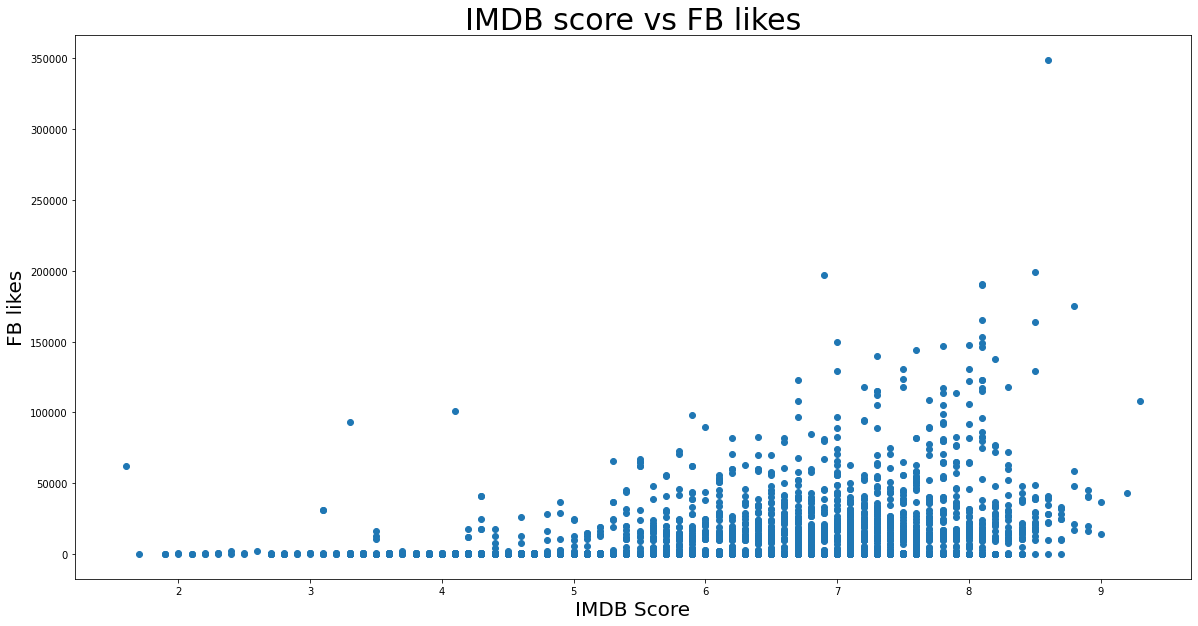

In [35]:
plt.figure(figsize=(20,10))
plt.scatter(movies_df['imdb_score'],movies_df['movie_facebook_likes'])
plt.title('IMDB score vs FB likes',size=30)
plt.xlabel('IMDB Score',size=20)
plt.ylabel('FB likes',size=20)

The above scatter plot can also be shown as a frequency plot using ggplot as shown below

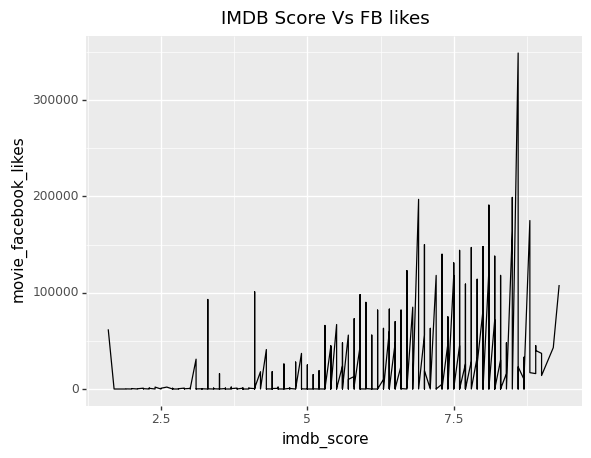

<ggplot: (7568910745)>

In [36]:
(ggplot(movies_df)+aes(x='imdb_score',y='movie_facebook_likes')+geom_line()+ labs(title='IMDB Score Vs FB likes'))

In [37]:
plt.figure(figsize=(20,10))
movies_df=movies_df.sort_values(by='Net profit',ascending=False)

<Figure size 1440x720 with 0 Axes>

In [38]:
movies_df_new=movies_df.head(20)

In [39]:
movies_df_new['movie_title']

2988                                   The Host 
3859                             Lady Vengeance 
3005                                   Fateless 
2323                          Princess Mononoke 
2334                                   Steamboy 
3423                                      Akira 
4542                              Godzilla 2000 
3851                                      Tango 
3075                     Kabhi Alvida Naa Kehna 
3273                                      Kites 
1338                                  Red Cliff 
3311                   The Legend of Suriyothai 
1016    The Messenger: The Story of Joan of Arc 
2740                                  Ong-bak 2 
5                                   John Carter 
3659                              The Protector 
91                            The Polar Express 
3877                                        Paa 
28                                   Battleship 
2339    Les couloirs du temps: Les visiteurs II 
Name: movie_title, d

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

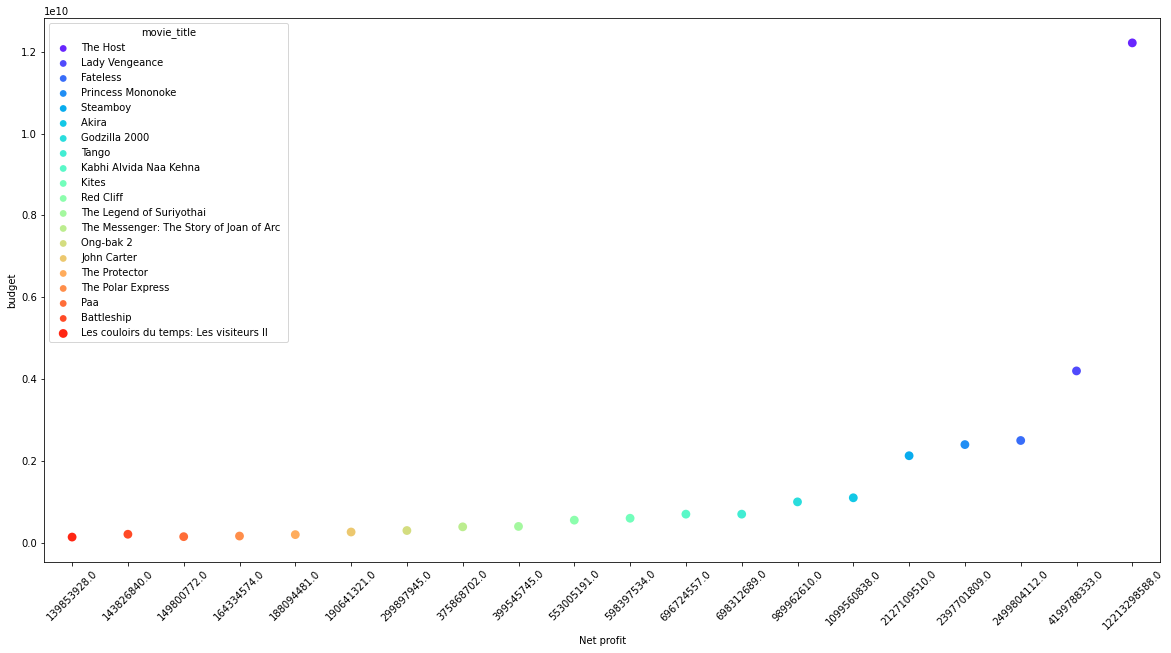

In [40]:

plt.figure(figsize=(20,10))
sns.pointplot('Net profit', 'budget'
              , data=movies_df_new , hue=movies_df_new['movie_title'],palette='rainbow')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

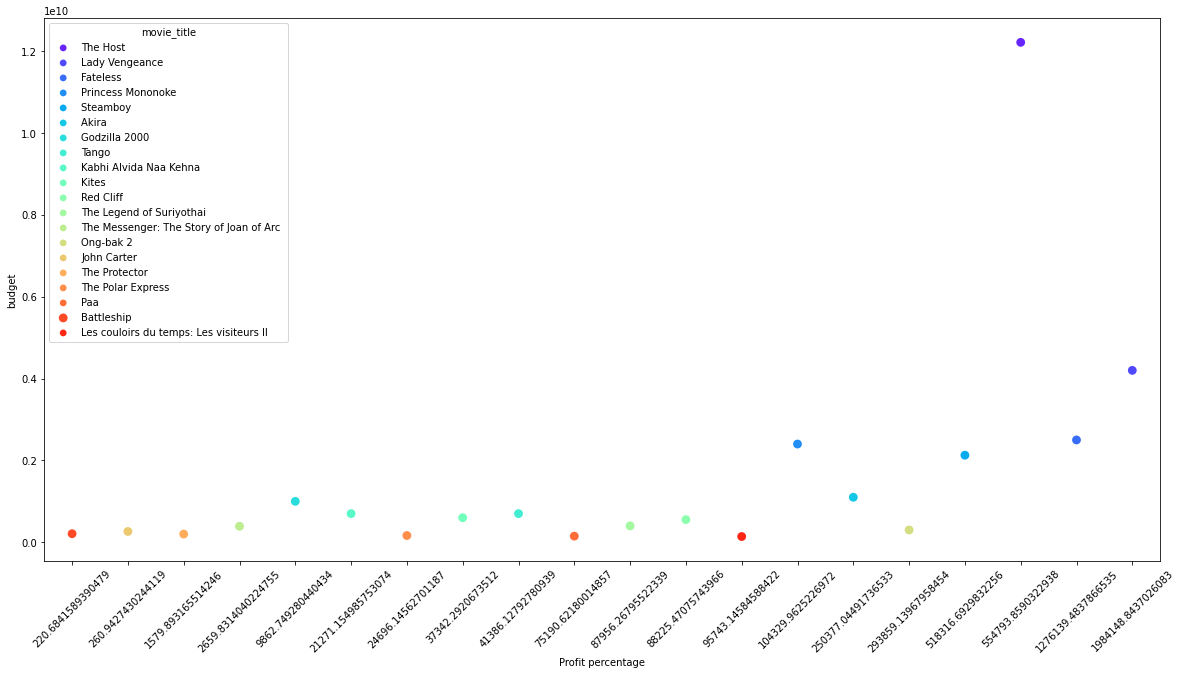

In [41]:
plt.figure(figsize=(20,10))
sns.pointplot('Profit percentage', 'budget'
              , data=movies_df_new , hue=movies_df_new['movie_title'],palette='rainbow')
plt.xticks(rotation=45)

In [42]:
movies_df=movies_df.sort_values(by='Profit percentage',ascending=True)
movies_df_new=movies_df.head(20)

<Figure size 1440x720 with 0 Axes>

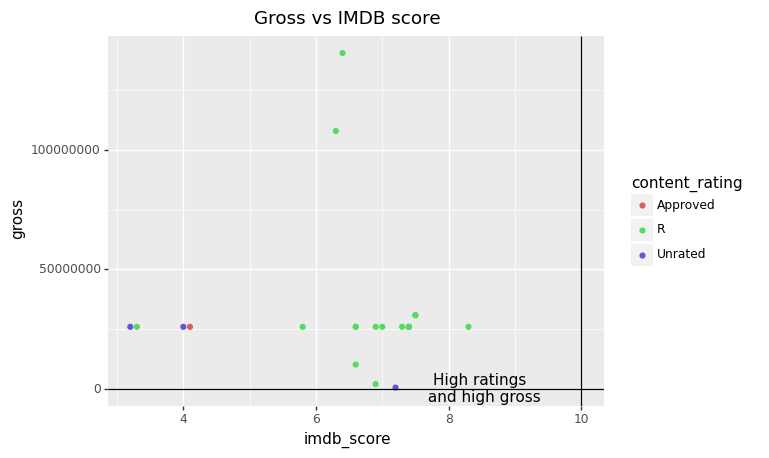

<ggplot: (7571045625)>

In [43]:
plt.figure(figsize=(20,10))

(ggplot(movies_df_new)+aes(x='imdb_score',y='gross',color='content_rating')
 + geom_point()+labs(title='Gross vs IMDB score')+annotate('text',x=8.5,y=10000,label='High ratings \n and high gross')
 +geom_hline(aes(yintercept = 600)) + 
  geom_vline(aes(xintercept = 10)))

In [44]:
corr=movies_df.corr()

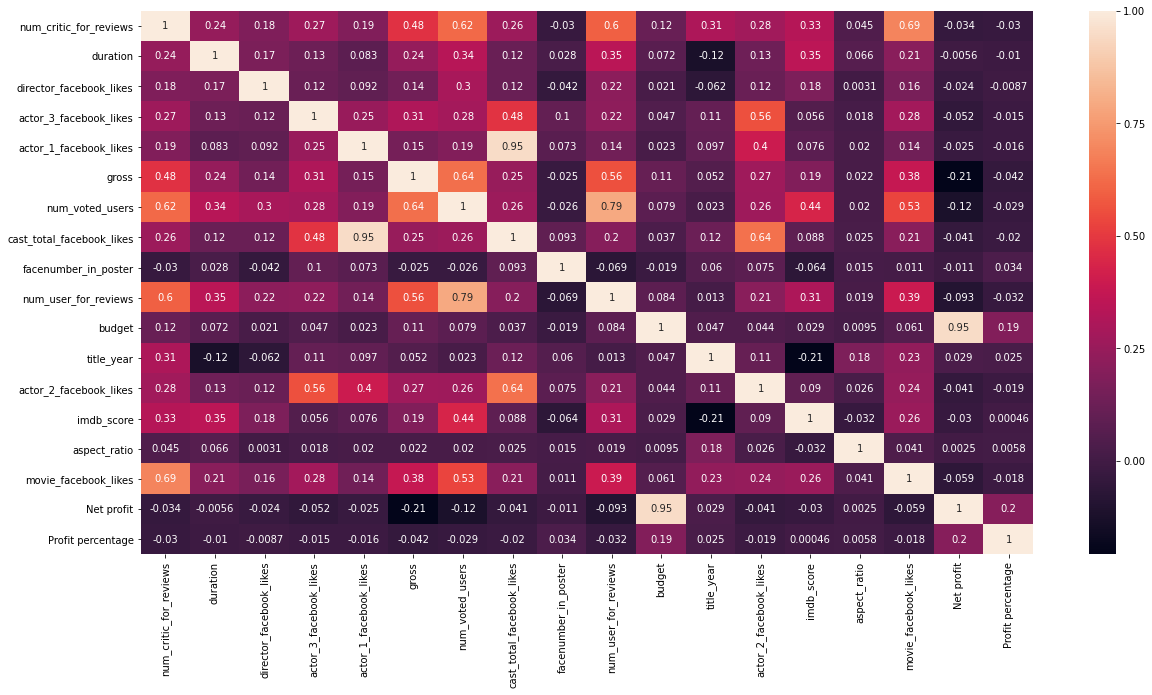

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [46]:
movies_df['imdb_binned_score']=pd.cut(movies_df['imdb_score'],bins=[0,4,6,8,10],right=True,labels=False)

In [47]:
movies_df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Net profit,Profit percentage,imdb_binned_score
4793,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,Micah Sloat,...,R,1.500000e+04,2007.0,109.0,6.3,1.85,12000,-1.079023e+08,-9.998610e+01,2
4799,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,Greg Ayres,...,Unrated,2.180000e+02,2003.0,20.0,7.2,1.37,754,-5.917960e+05,-9.996318e+01,2
4707,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,Heather Donahue,...,R,6.000000e+04,1999.0,170.0,6.4,1.33,0,-1.404701e+08,-9.995730e+01,2
5024,Jason Trost,42.0,78.0,91.0,86.0,Jason Trost,407.0,26005908.0,Sci-Fi|Thriller,Sean Whalen,...,Unrated,2.000000e+04,2011.0,91.0,4.0,2.35,835,-2.598591e+07,-9.992309e+01,0
5018,Alex Kendrick,5.0,120.0,589.0,4.0,Lisa Arnold,51.0,26005908.0,Drama,Shannen Fields,...,R,2.000000e+04,2003.0,49.0,6.9,1.85,725,-2.598591e+07,-9.992309e+01,2
4957,David Lynch,152.0,89.0,0.0,121.0,Jack Nance,195.0,26005908.0,Fantasy|Horror|Sci-Fi,Hal Landon Jr.,...,Unrated,2.000000e+04,1977.0,158.0,7.4,1.37,0,-2.598591e+07,-9.992309e+01,2
5017,Travis Legge,1.0,90.0,138.0,138.0,Suzi Lorraine,370.0,26005908.0,Comedy|Romance,Kristen Seavey,...,R,2.200000e+04,2013.0,184.0,3.3,1.78,200,-2.598391e+07,-9.991540e+01,0
5013,Eric Eason,28.0,79.0,3.0,42.0,Panchito Gómez,93.0,26005908.0,Drama|Family,Franky G,...,R,2.400000e+04,2002.0,46.0,7.0,1.78,61,-2.598191e+07,-9.990771e+01,2
5000,Travis Legge,2.0,83.0,138.0,76.0,Patricia Raven,307.0,26005908.0,Horror,Elissa Dowling,...,Unrated,4.000000e+04,2011.0,114.0,3.2,2.35,239,-2.596591e+07,-9.984619e+01,0
4995,Chad Hartigan,34.0,83.0,3.0,69.0,Paul Eenhoorn,695.0,26005908.0,Drama,Jan Haley,...,R,4.200000e+04,2013.0,571.0,6.6,16.00,234,-2.596391e+07,-9.983850e+01,2


In [48]:
movies_df.drop('imdb_score',axis=1,inplace=True)

In [49]:
movies_df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Net profit,Profit percentage,imdb_binned_score
4793,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,Micah Sloat,...,USA,R,15000.0,2007.0,109.0,1.85,12000,-107902283.0,-99.986100,2
4799,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,Greg Ayres,...,USA,Unrated,218.0,2003.0,20.0,1.37,754,-591796.0,-99.963177,2
4707,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,Heather Donahue,...,USA,R,60000.0,1999.0,170.0,1.33,0,-140470114.0,-99.957305,2
5024,Jason Trost,42.0,78.0,91.0,86.0,Jason Trost,407.0,26005908.0,Sci-Fi|Thriller,Sean Whalen,...,USA,Unrated,20000.0,2011.0,91.0,2.35,835,-25985908.0,-99.923094,0
5018,Alex Kendrick,5.0,120.0,589.0,4.0,Lisa Arnold,51.0,26005908.0,Drama,Shannen Fields,...,USA,R,20000.0,2003.0,49.0,1.85,725,-25985908.0,-99.923094,2


In [50]:
movies_df=pd.get_dummies(data=movies_df,columns=['country'],drop_first=True)

In [51]:
movies_df=pd.get_dummies(data=movies_df,columns=['content_rating'],drop_first=True)

In [52]:
X=movies_df[['duration','director_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','facenumber_in_poster','budget','title_year','aspect_ratio','movie_facebook_likes','country_USA','content_rating_G','content_rating_GP','content_rating_M','content_rating_NC-17','content_rating_Not Rated','content_rating_PG','content_rating_PG-13','content_rating_Passed','content_rating_R','content_rating_TV-14','content_rating_TV-G','content_rating_TV-PG','content_rating_Unrated','content_rating_X']]

In [53]:
y=movies_df['imdb_binned_score']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3,stratify=y)

In [55]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
X_train=scaled.fit_transform(X_train)
X_test=scaled.fit_transform(X_test)

In [56]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(X_train,y_train)

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred=logit.predict(X_test)

In [58]:
df_pred=pd.DataFrame(y_test)

In [59]:
df_pred=df_pred.rename(columns={'imdb_binned_score':'Actual binned score'})

In [60]:
df_pred['Predicted score']=y_pred
df_pred.head()

,Actual binned score,Predicted score
408,2,2
4884,2,2
2662,0,2
1872,2,2
3854,3,3


In [61]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)
print('Accurace:',metrics.accuracy_score(y_test,y_pred))

[[  0  23  24   0]
 [  1  68 332   0]
 [  0  24 888   0]
 [  0   1  34  27]]
Accurace: 0.6912798874824191


Text(0, 0.5, 'True positive rate')

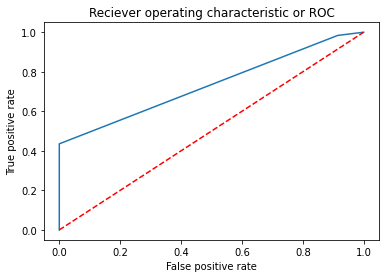

In [62]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred,3)
roc_auc=metrics.auc(fpr,tpr)
plt.title('Reciever operating characteristic or ROC')
plt.plot(fpr,tpr,label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Hence, using a Logistic regression gives us correct results roughly 70 % times.

In [63]:
from sklearn.cluster import KMeans
kmeans_scaled=KMeans(5)
kmeans_scaled.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
y_pred=kmeans_scaled.fit_predict(X_test)

In [65]:
kmeans_df=pd.DataFrame(y_test)

In [66]:
kmeans_df['Predicted']=y_pred

In [67]:
kmeans_df.head()

,imdb_binned_score,Predicted
408,2,2
4884,2,0
2662,0,0
1872,2,2
3854,3,0


In [68]:
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)

In [69]:
print(cnf_matrix)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

[[ 15   0  17   1  14]
 [185   1 158   0  57]
 [485  40 233   3 151]
 [ 15  27   7   0  13]
 [  0   0   0   0   0]]
Accuracy: 0.1751054852320675


Clustering doesn't give us good results. Need to select the clusters in a better way.

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

In [71]:
knnpred=knn.predict(X_test)
cnf_matrix=metrics.confusion_matrix(y_test,knnpred)
print(cnf_matrix)
print('Accuracy:',metrics.accuracy_score(y_test,knnpred))

[[  0  28  19   0]
 [  0 164 237   0]
 [  1 129 782   0]
 [  0   2  53   7]]
Accuracy: 0.670182841068917


KNN classifiers gives us 67 % accuracy

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
rfcpred=rfc.predict(X_test)
cnf_matrix=metrics.confusion_matrix(y_test,rfcpred)
print(cnf_matrix)
print('Accuracy:',metrics.accuracy_score(y_test,rfcpred))

[[  0  21  26   0]
 [  0 168 233   0]
 [  0  74 838   0]
 [  0   0  32  30]]
Accuracy: 0.7285513361462729


Random forest classifier gives us an accuracy of 72.5 %

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl=GradientBoostingClassifier(n_estimators=100,learning_rate=0.03,max_depth=2)
gbcl=gbcl.fit(X_train,y_train)
y_pred=gbcl.predict(X_test)
cnf_matrix=metrics.confusion_matrix(y_pred,y_test)
print(cnf_matrix)
print('Accuracy:',metrics.accuracy_score(y_pred,y_test) )

[[  0   0   0   0]
 [ 16 107  32   0]
 [ 31 294 876  30]
 [  0   0   4  32]]
Accuracy: 0.7137834036568214


Gradient boosting classifer gives us an accuracy of 71.37 %